### IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
from numpy.random import uniform
import pandas as pd
pd.set_option("display.max_column", 500)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors
from random import sample
from math import isnan

### IMPORT THE DATASET

In [2]:
country_data = pd.read_csv("Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### SANITY CHECK

In [3]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country_data.shape

(167, 10)

In [5]:
country_data.describe(percentiles = (.10, .25, .50, .75, .90, .95))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


Cheking for Speling Mistake

In [6]:
country_data["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

### REMOVING OUTLIERS 

Visualising Data For outlier Treatment

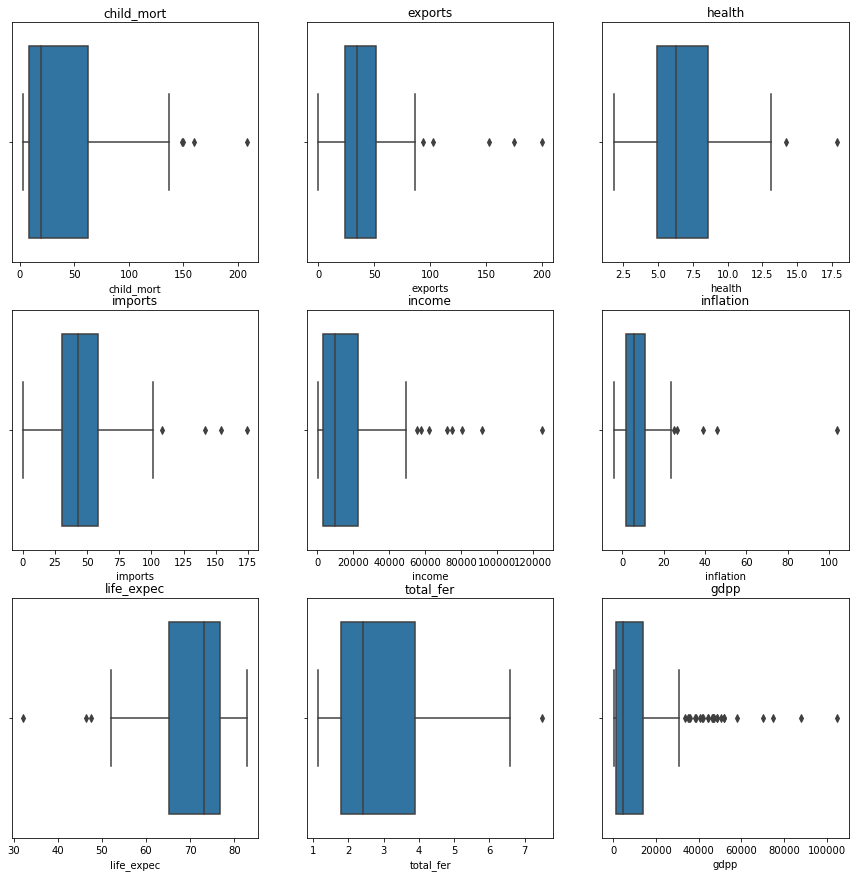

In [7]:
cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize= (15,15))

for i in cols:
    plt.subplot(3, 3,cols.index(i)+1)
    sns.boxplot(country_data[i])
    plt.title(i)
plt.show()    

In [8]:
Q3 = country_data.gdpp.quantile(0.95)
updated_country_data = country_data[(country_data.gdpp <= Q3)]

We are removing outliers for gdpp because there is more outliers and removing of it will not affect the Data set

In [9]:
updated_country_data.describe(percentiles = (.10, .25, .50, .75, .90, .95, .99))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.500000,15.210000,3.737000,22.540000,1479.000000,0.664000,57.640000,1.440000,586.900000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,77.615000,11.345000,80.320000,41415.000000,21.125000,80.960000,5.912000,41815.000000


In [10]:
updated_country_data.shape

(158, 10)

In [11]:
updated_country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


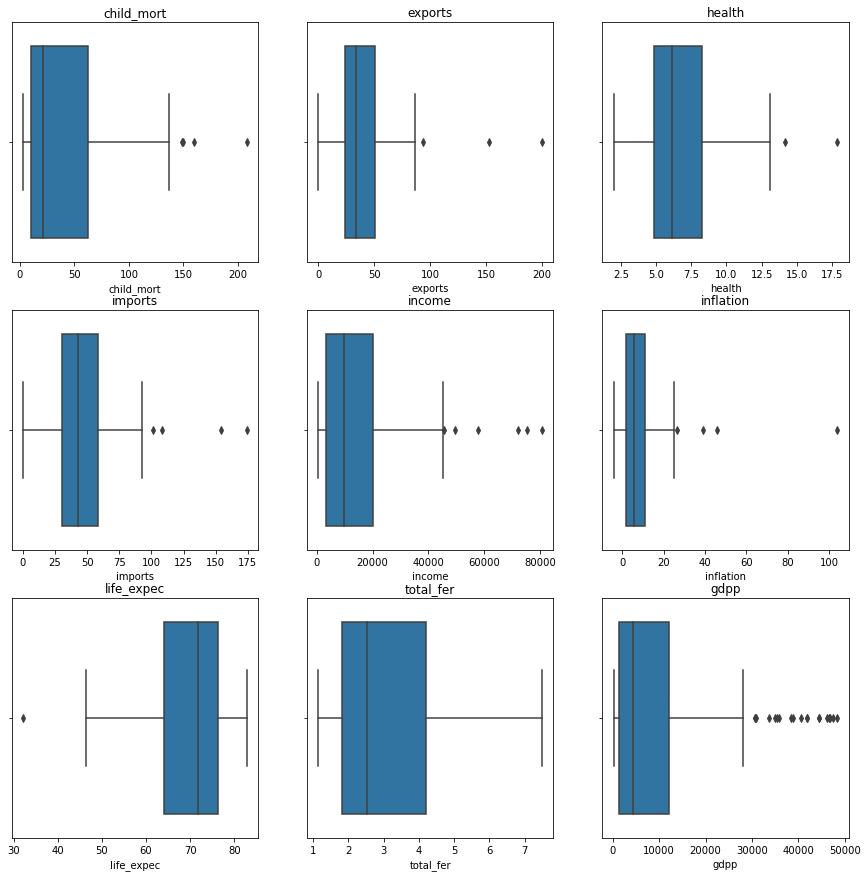

In [12]:
cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize= (15,15))

for i in cols:
    plt.subplot(3, 3,cols.index(i)+1)
    sns.boxplot(updated_country_data[i])
    plt.title(i)
plt.show()    

In [13]:
updated_country_data.set_index('country', inplace = True)

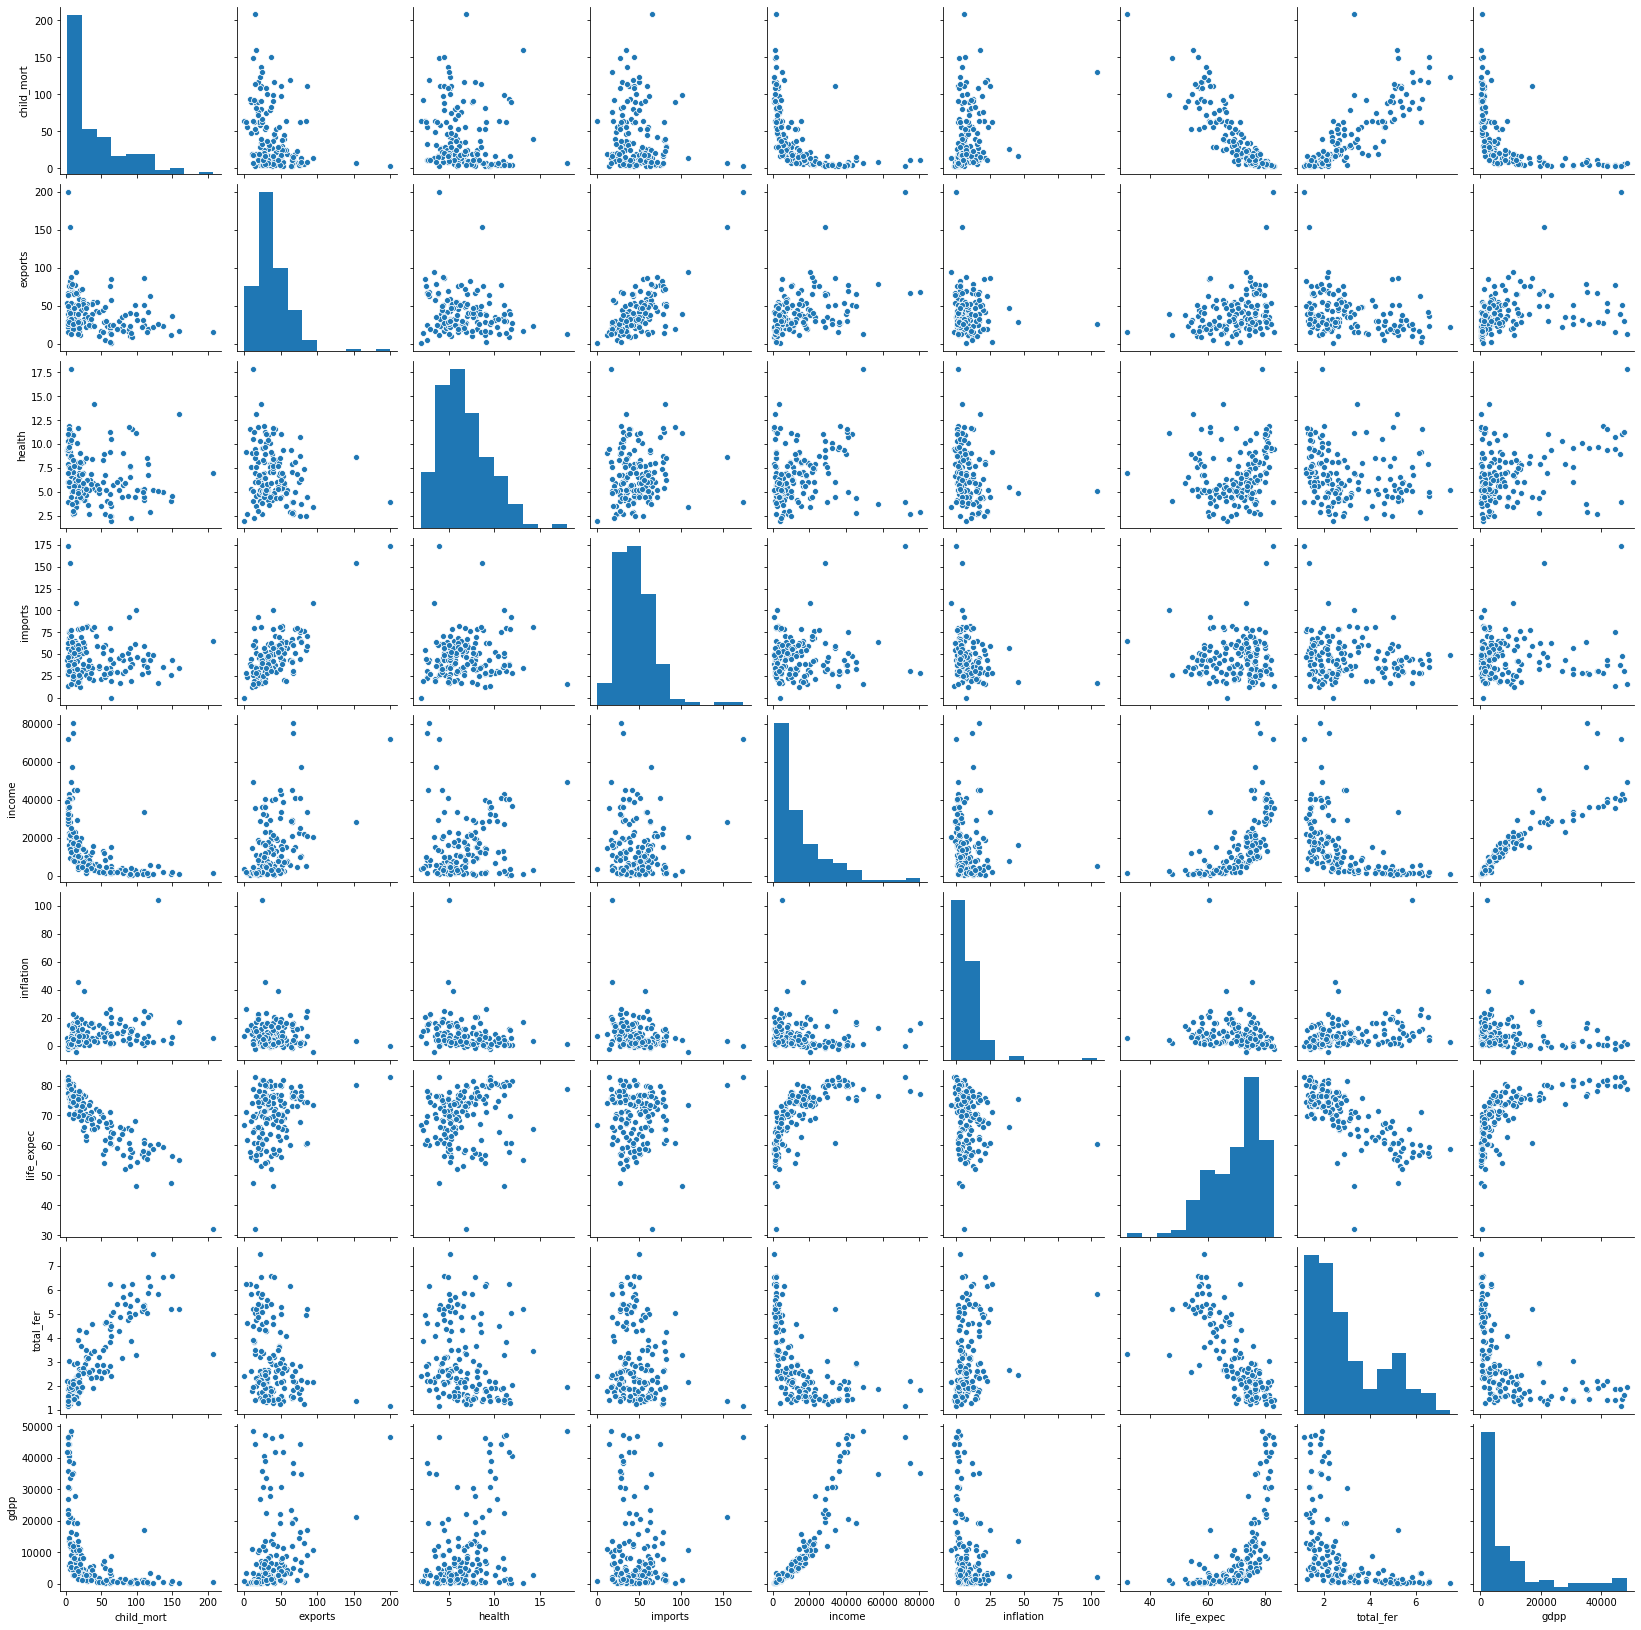

In [14]:
sns.pairplot(updated_country_data)
plt.show()

In [15]:
scaler = StandardScaler()

SCALEING DATASET

In [16]:
updated_scaler_data = scaler.fit_transform(updated_country_data)

In [17]:
updated_scaler_data

array([[ 1.2348468 , -1.17025328,  0.33316971, ..., -1.57290118,
         1.83898931, -0.73837646],
       [-0.58270965, -0.45492647, -0.05183376, ...,  0.7236459 ,
        -0.88967589, -0.45936668],
       [-0.3184725 , -0.04162654, -0.94145343, ...,  0.74649712,
        -0.07827425, -0.4301799 ],
       ...,
       [-0.41725274,  1.29365017,  0.05656528, ...,  0.35802647,
        -0.69336904, -0.6786619 ],
       [ 0.39768425, -0.37544571, -0.56392576, ..., -0.28180754,
         1.08647972, -0.6786619 ],
       [ 1.05951187, -0.09726307, -0.29853501, ..., -2.05277669,
         1.56415972, -0.66682942]])

PRINCIPAL COMPONENT ANALYSIS

In [18]:
pca1 = PCA(random_state = 42)
pca1.fit(updated_scaler_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca1.components_

array([[-4.29030525e-01,  2.55209832e-01,  1.34178285e-01,
         1.31450432e-01,  4.07693446e-01, -1.79172211e-01,
         4.31281152e-01, -4.14623599e-01,  3.99105167e-01],
       [ 1.11571336e-01,  6.26379514e-01, -2.77405040e-01,
         6.77160121e-01, -2.31878558e-02, -5.16544119e-02,
        -1.67479074e-01,  7.48372976e-02, -1.51147079e-01],
       [-4.15586874e-02,  1.65804096e-01, -6.21898369e-01,
        -3.00546950e-01,  2.52933247e-01,  6.41231036e-01,
         1.20926305e-01,  5.91157438e-03,  6.23316904e-02],
       [ 3.78896334e-01,  1.25334264e-01,  4.18106890e-01,
         3.92312068e-02,  4.08208237e-01,  2.46846528e-01,
        -2.31647606e-01,  3.66642523e-01,  4.98720267e-01],
       [-2.10302855e-01,  2.05622263e-02,  4.97644383e-01,
         2.62211666e-01, -2.60517467e-01,  6.88800973e-01,
         1.29156175e-01, -1.65619335e-01, -2.29167627e-01],
       [ 1.86245017e-01, -5.01345979e-02, -4.28272915e-03,
        -4.26434872e-02,  1.45028292e-01,  6.489172

In [20]:
var1 = pca1.explained_variance_ratio_
var1

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472,
       0.02594781, 0.01392215, 0.01011373, 0.00656633])

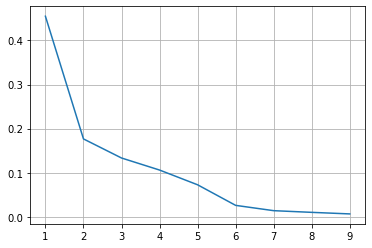

In [21]:
plt.plot(range(1, len(var1)+1), var1)
plt.grid()
plt.show()

In [22]:
# Checking and Understanding  how the original 9 variables are loaded on the principal components. It can be verified from above as well.

colnames = list(updated_country_data.columns)
pca_df1 = pd.DataFrame({ 'Attribute':colnames,'pca_1':pca1.components_[0],'pca_2':pca1.components_[1],'pca_3':pca1.components_[2], 
                       'pca_4':pca1.components_[3],'pca_5':pca1.components_[4]})
pca_df1

,Attribute,pca_1,pca_2,pca_3,pca_4,pca_5
0,child_mort,-0.429031,0.111571,-0.041559,0.378896,-0.210303
1,exports,0.255210,0.626380,0.165804,0.125334,0.020562
2,health,0.134178,-0.277405,-0.621898,0.418107,0.497644
3,imports,0.131450,0.677160,-0.300547,0.039231,0.262212
4,income,0.407693,-0.023188,0.252933,0.408208,-0.260517
5,inflation,-0.179172,-0.051654,0.641231,0.246847,0.688801
6,life_expec,0.431281,-0.167479,0.120926,-0.231648,0.129156
7,total_fer,-0.414624,0.074837,0.005912,0.366643,-0.165619
8,gdpp,0.399105,-0.151147,0.062332,0.498720,-0.229168


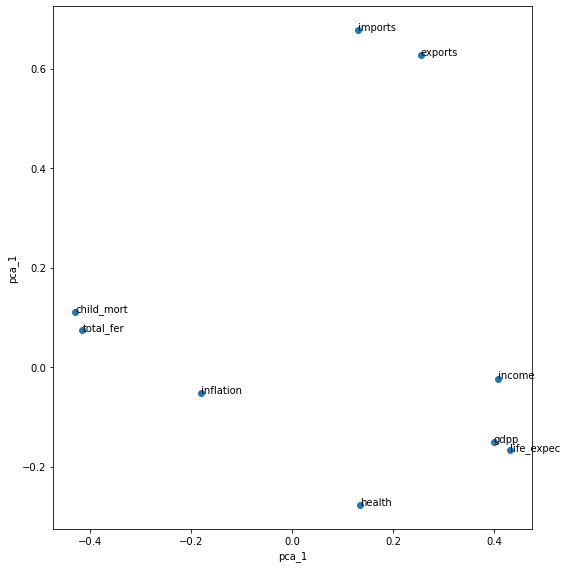

In [23]:
plt.figure(figsize = (8,8))
plt.scatter(pca_df1.pca_1, pca_df1.pca_2)
plt.xlabel('pca_1')
plt.ylabel('pca_1')
for i, features in enumerate(pca_df1.Attribute):
    plt.annotate(features, (pca_df1.pca_1[i],pca_df1.pca_2[i]))
plt.tight_layout()
plt.show()

In [24]:
cumsum1 = np.cumsum(var1)
cumsum1

array([0.45480475, 0.63144115, 0.76480304, 0.87084527, 0.94344999,
       0.9693978 , 0.98331995, 0.99343367, 1.        ])

Ploting scree plot To obtain the optimal number of Principal component

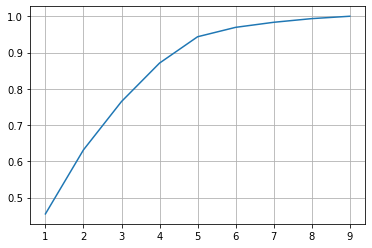

In [25]:
plt.plot(range(1, len(cumsum1)+1), cumsum1)
plt.grid()
plt.show()

SELECT THE REQUIRED NUMBER OF COMPONENTS

In [26]:
pca2 = PCA(n_components =5, random_state = 42)
pca_df2 = pca2.fit_transform(updated_scaler_data)

In [27]:
pca2.components_

array([[-0.42903052,  0.25520983,  0.13417829,  0.13145043,  0.40769345,
        -0.17917221,  0.43128115, -0.4146236 ,  0.39910517],
       [ 0.11157134,  0.62637951, -0.27740504,  0.67716012, -0.02318786,
        -0.05165441, -0.16747907,  0.0748373 , -0.15114708],
       [-0.04155869,  0.1658041 , -0.62189837, -0.30054695,  0.25293325,
         0.64123104,  0.12092631,  0.00591157,  0.06233169],
       [ 0.37889633,  0.12533426,  0.41810689,  0.03923121,  0.40820824,
         0.24684653, -0.23164761,  0.36664252,  0.49872027],
       [-0.21030285,  0.02056223,  0.49764438,  0.26221167, -0.26051747,
         0.68880097,  0.12915617, -0.16561933, -0.22916763]])

In [28]:
var2 = pca2.explained_variance_ratio_
var2

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472])

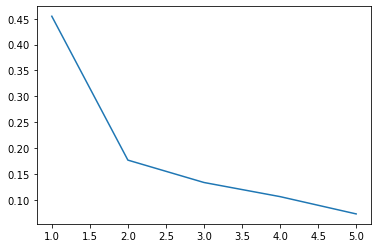

In [29]:
plt.plot(range(1, len(var2)+1), var2)
plt.show()

In [30]:
cumsum2 = np.cumsum(var2)
cumsum2

array([0.45480475, 0.63144115, 0.76480304, 0.87084527, 0.94344999])

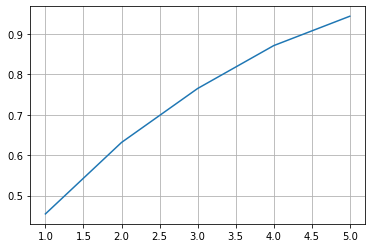

In [31]:
plt.plot(range(1, len(cumsum2)+1), cumsum2)
plt.grid()
plt.show()

In [32]:
pca_df2.shape

(158, 5)

In [33]:
pca_df2 = pd.DataFrame(pca_df2,columns = ["pca_1", "pca_2", "pca_3", "pca_4", "pca_5"])
pca_df2.head()

,pca_1,pca_2,pca_3,pca_4,pca_5
0,-2.899446,-0.204830,-0.795323,0.809408,-0.163856
1,0.571630,-0.364424,-0.288068,-1.227720,0.307267
2,-0.082345,-0.340226,1.298959,-0.823049,0.179209
3,-2.830323,1.445931,1.561378,1.105904,-0.447645
4,1.295289,0.326882,-0.159968,-0.665877,-0.170349


CHECk THE CLUSTER TANDENCY

In [34]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(pca_df2)

0.8234666032294685

K-MEANS ALGORITHM

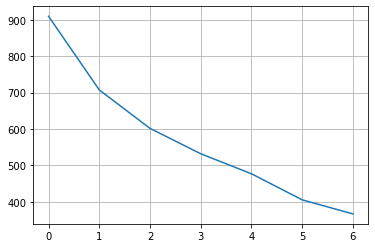

In [36]:
k_clustered_data = pca_df2.copy()
range_clusters = [2,3,4,5,6,7,8]
ssd = []
for i in range_clusters:
    kmeans = KMeans(n_clusters = i, max_iter = 50)
    kmeans.fit(k_clustered_data)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.grid()
plt.show()

Sillhoutte Score Analysis

In [37]:
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(k_clustered_data)
    sse_.append([k, silhouette_score(k_clustered_data, kmeans.labels_)])

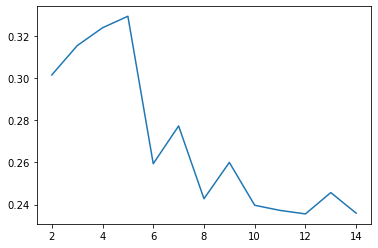

In [40]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

CHOOSE THE OPTIMAL K VALUE

From the above analysis we can consider the optimal number of K = 4

In [41]:
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(pca_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
country_datak=pca_df2.copy()
country_datak["Cluster"] = kmeans.labels_
country_datak.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,Cluster
0,-2.899446,-0.204830,-0.795323,0.809408,-0.163856,3
1,0.571630,-0.364424,-0.288068,-1.227720,0.307267,1
2,-0.082345,-0.340226,1.298959,-0.823049,0.179209,1
3,-2.830323,1.445931,1.561378,1.105904,-0.447645,3
4,1.295289,0.326882,-0.159968,-0.665877,-0.170349,1


In [43]:
country_datak.shape

(158, 6)

In [44]:
grouped_df = country_datak.groupby("Cluster")["pca_1", 'pca_2', 'pca_3', 'pca_4', 'pca_5'].sum()
grouped_df = grouped_df.reset_index()
grouped_df

,Cluster,pca_1,pca_2,pca_3,pca_4,pca_5
0,0,76.423298,-22.973610,3.338803,26.416085,-11.413719
1,1,23.223858,1.293862,2.068731,-58.497860,19.869062
2,2,10.542269,12.353970,-0.011629,3.041086,0.948962
3,3,-110.189424,9.325778,-5.395904,29.040690,-9.404305


Visualising distribution of principal components for each cluster

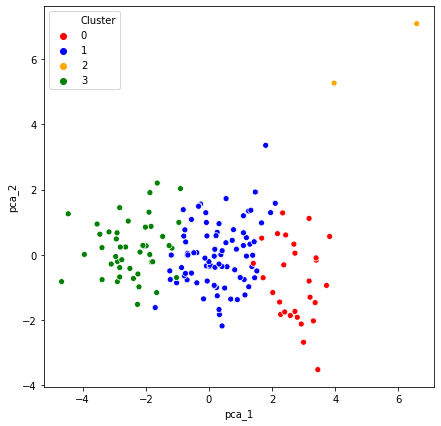

In [45]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = "pca_1", y = "pca_2", hue = "Cluster", data = country_datak, palette = ["red", "blue", "orange", "green"])
plt.show()

In [46]:
country_datak = pd.merge(updated_country_data.reset_index(),country_datak,left_index=True,right_index=True)
country_datak.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pca_1,pca_2,pca_3,pca_4,pca_5,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.899446,-0.204830,-0.795323,0.809408,-0.163856,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.571630,-0.364424,-0.288068,-1.227720,0.307267,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.082345,-0.340226,1.298959,-0.823049,0.179209,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.830323,1.445931,1.561378,1.105904,-0.447645,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.295289,0.326882,-0.159968,-0.665877,-0.170349,1


In [47]:
country_datak.shape

(158, 16)

In [48]:
country_datak.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
pca_1         0
pca_2         0
pca_3         0
pca_4         0
pca_5         0
Cluster       0
dtype: int64

Visualization of Distribution of Attributes for each cluster

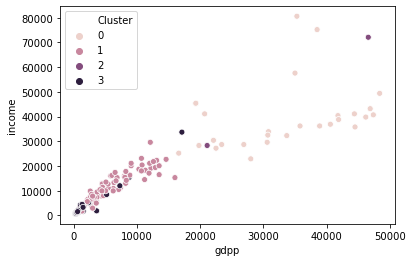

In [49]:
sns.scatterplot(x = "gdpp", y = "income", hue = "Cluster", data = country_datak)
plt.show()

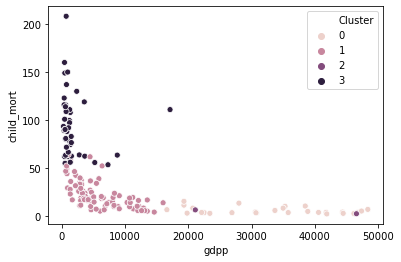

In [50]:
sns.scatterplot(x = "gdpp", y = "child_mort", hue = "Cluster", data = country_datak)
plt.show()

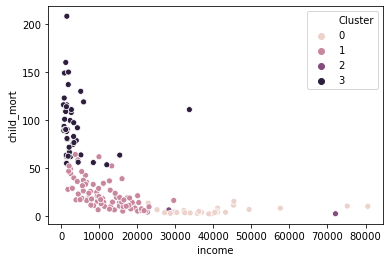

In [51]:
sns.scatterplot(x = "income", y = "child_mort", hue = "Cluster", data = country_datak)
plt.show()

Now we have to drop The unnecessary column like principal components

In [52]:
country_datak.drop(["pca_1", 'pca_2', 'pca_3', 'pca_4', 'pca_5'], axis = 1, inplace = True)
country_datak.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [53]:
grouped_df = country_datak.groupby("Cluster")['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()
grouped_df = grouped_df.reset_index()
grouped_df

,Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,6.125000,45.692857,8.500357,40.739286,39407.142857,3.747214,79.232143,1.840000,33214.285714
1,1,22.772289,39.917940,6.296867,47.653806,11398.433735,7.609506,72.478313,2.331928,5892.915663
2,2,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000
3,3,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111


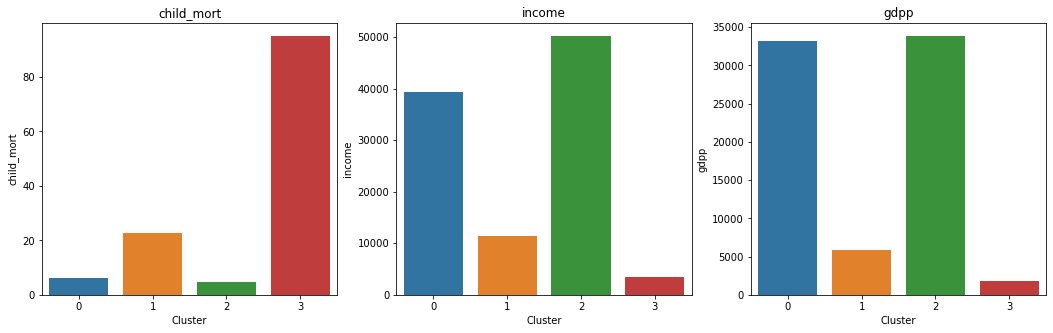

In [54]:
cols = ["child_mort", "income", "gdpp"]
plt.figure(figsize = (18,5))
for i in cols:
    plt.subplot(1,3,cols.index(i)+1)
    sns.barplot(x = "Cluster", y = i, data = grouped_df)
    plt.title(i)
plt.show()    

Now we can clearly see that cluster 3 is preferable so we have to binning it

In [70]:
cluster3 = pd.DataFrame(country_datak[country_datak["Cluster"] == 3])

In [71]:
cluster3.sort_values(by = ["gdpp", "income", "child_mort" ], inplace = True, ascending = [True, True, False])
cluster3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,3
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,3
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,3
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,3


### Now we can easily find the name of five countries which are need aid esentialy (By K-Means Algorithm)


The name of countries are:

Burundi

Liberia

Congo, Dem.Rep.

Niger

Sierra Leone

### HIERARCHICAL CLUSTERNG

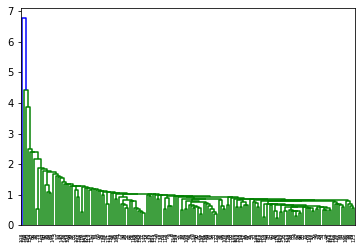

In [72]:
# single linkage
hirarchical_clustered_data = pca_df2.copy()
merging = linkage(hirarchical_clustered_data, method = "single", metric = "euclidean")
dendrogram(merging)
plt.show()

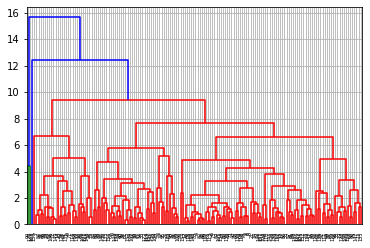

In [73]:
# Complete linkage
merging = linkage(hirarchical_clustered_data, method = "complete", metric = "euclidean")
dendrogram(merging)
plt.grid()
plt.show()

CHOOSE THE optimal NUMBER OF CLUSTER = 4 from above Hierarchcal Clustering analysis

In [74]:
cluster_labels = cut_tree(merging, n_clusters = 4).reshape(-1, )

In [75]:
country_datah=pca_df2.copy()
country_datah["cluster_labels"] = cluster_labels
country_datah.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,cluster_labels
0,-2.899446,-0.204830,-0.795323,0.809408,-0.163856,0
1,0.571630,-0.364424,-0.288068,-1.227720,0.307267,0
2,-0.082345,-0.340226,1.298959,-0.823049,0.179209,0
3,-2.830323,1.445931,1.561378,1.105904,-0.447645,0
4,1.295289,0.326882,-0.159968,-0.665877,-0.170349,0


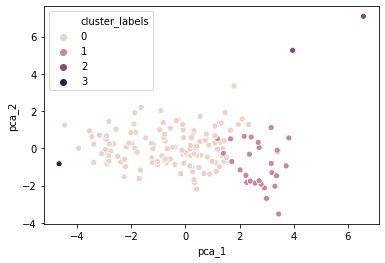

In [76]:
sns.scatterplot(x = "pca_1", y = "pca_2", hue = "cluster_labels", data = country_datah)
plt.show()

In [77]:
country_datah = pd.merge(updated_country_data.reset_index(),country_datah,left_index=True,right_index=True)
country_datah.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pca_1,pca_2,pca_3,pca_4,pca_5,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.899446,-0.204830,-0.795323,0.809408,-0.163856,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.571630,-0.364424,-0.288068,-1.227720,0.307267,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.082345,-0.340226,1.298959,-0.823049,0.179209,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.830323,1.445931,1.561378,1.105904,-0.447645,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.295289,0.326882,-0.159968,-0.665877,-0.170349,0


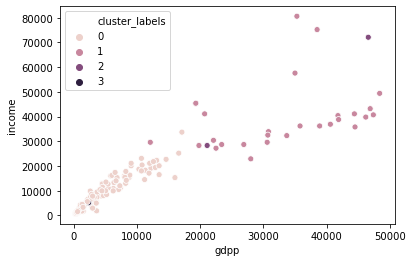

In [78]:
sns.scatterplot(x = "gdpp", y = "income", hue = "cluster_labels", data = country_datah)
plt.show()

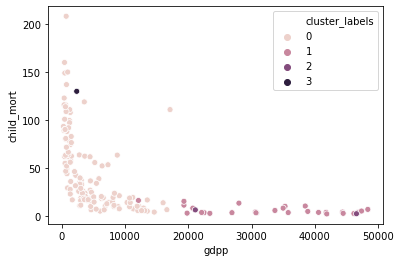

In [79]:
sns.scatterplot(x = "gdpp", y = "child_mort", hue = "cluster_labels", data = country_datah)
plt.show()

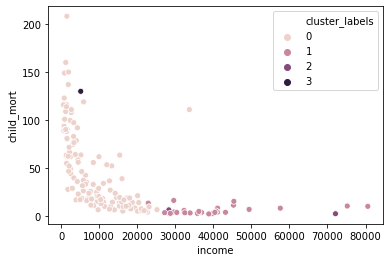

In [80]:
sns.scatterplot(x = "income", y = "child_mort", hue = "cluster_labels", data = country_datah)
plt.show()

In [81]:
grouped_df2 = country_datah.groupby("cluster_labels")["income", 'child_mort', "gdpp"].mean()
grouped_df2 = grouped_df2.reset_index()
grouped_df2

,cluster_labels,income,child_mort,gdpp
0,0,8628.448819,47.482677,4494.362205
1,1,39564.285714,6.467857,33053.571429
2,2,50200.000000,4.800000,33850.000000
3,3,5150.000000,130.000000,2330.000000


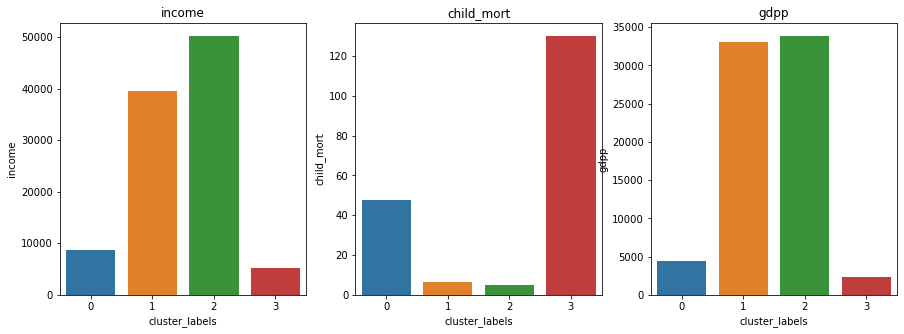

In [82]:
features = ['income', 'child_mort', 'gdpp']
x = grouped_df2["cluster_labels"]
plt.figure(figsize = (15,5))
for i in features:
    plt.subplot(1,3, (features.index(i)+1))
    sns.barplot(x, y = i,data = grouped_df2)
    plt.title(i)
plt.show()    

In [83]:
country_datah.drop(["pca_1", 'pca_2', 'pca_3', 'pca_4', "pca_5"], axis = 1, inplace = True)

By considering the above analysis we can consider that cluster 0 is preferable as per our requirement

In [86]:
cluster0 = pd.DataFrame(country_datah[country_datah["cluster_labels"] == 0])

In [87]:
cluster0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [88]:
cluster0.sort_values(by = ["gdpp", "income", "child_mort" ], inplace = True, ascending = [True, True, False])
cluster0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


From the above Hierarchichal clustering we can clearly consider the name of contries which are requires aid essentialy

Name of countries are:

Burundi
    
Liberia

Congo, Dem. Rep

Niger

Sierra leone

We can observe that the name countries obtained by k-means clustering and hierarchichal clustering are nearly to be same.